# VisClaw.jl - examples of usage
   
<div style="text-align: right;"> Feb.  2019 </div>
<div style="text-align: right;"> VisClaw.jl v0.4.0 </div>
<div style="text-align: right;"> Plots.jl v0.29.3 </div>
<div style="text-align: right;"> GR.jl v0.47.0 </div>
<div style="text-align: right;"> Clawpack v5.6.1 </div>
<div style="text-align: right;"> Takuya Miyashita (miyashita@hydrocoast.jp) </div>
   
## Load conditions and numerical results 
VisClaw.jl refers to a directory `_output` and read files in this directory such as `fort.q0000` and `claw.data`. 
Keep the directory as is after the simulation.  

### Topography (topo)
Topography and bathymetry data is loaded using `loadtopo()`

In [1]:
using VisClaw

# chile2010 _output
simdir = joinpath(CLAW,"geoclaw/examples/tsunami/chile2010/_output")

# load etopo through topo.data
topo = loadtopo(simdir)

# check
println(typeof(topo))
println(fieldnames(typeof(topo)))

VisClaw.Topo
(:ncols, :nrows, :x, :y, :dx, :dy, :elevation)


This process works through reading `topo.data` in `_output` directory.  
Specifying an actual filename is also available:

In [2]:
# load etopo by specifying a topofile and topotype (topotype=2)
topo = loadtopo(joinpath(CLAW,"geoclaw/scratch/etopo10min120W60W60S0S.asc"), 2)

# check
println(typeof(topo))
println(fieldnames(typeof(topo)))

VisClaw.Topo
(:ncols, :nrows, :x, :y, :dx, :dy, :elevation)


### Displacement of the topography (dtopo)
A dtopo can be loaded in the same manner:

In [3]:
# load dtopo from dtopo.data
dtopo = loaddtopo(simdir)

# check
println(typeof(dtopo))
println(fieldnames(typeof(dtopo)))

VisClaw.DTopo
(:mx, :my, :x, :y, :dx, :dy, :mt, :t0, :dt, :deform)


### Sea surface elevation
A method `loadsurface()` is useful to load the sea surface heights in `fort.qXXX` files in the form of Adaptive Mesh Refinement (AMR).

In [4]:
# load surface (fort.q0000 to fort.q0018)
amrall = loadsurface(simdir)

# check
println(typeof(amrall))
println(fieldnames(typeof(amrall)))
amrall.nstep, amrall.timelap

VisClaw.AMR
(:nstep, :timelap, :amr, :unittime)


(19, [0.0, 1800.0, 3600.0, 5400.0, 7200.0, 9000.0, 10800.0, 12600.0, 14400.0, 16200.0, 18000.0, 19800.0, 21600.0, 23400.0, 25200.0, 27000.0, 28800.0, 30600.0, 32400.0])

## Plot and save

### topo
Functions which names begin with a word `plots` can plot data using `Plots.jl`.
For example, `VisClaw.plotstopo(topo::VisClaw.Topo)` illustrates topography and bathymetry data.
The keyword arguments of the function are the same as `Plots.plot()`.

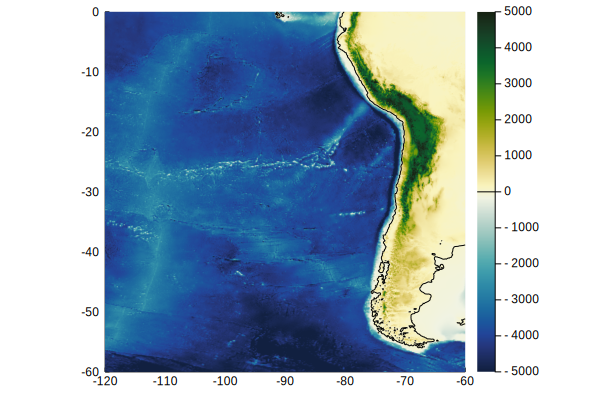

In [5]:
plt = plotstopo(topo; linetype=:heatmap, color=:delta, clims=(-5000,5000))
plt = plotscoastline!(plt, topo; lc=:black)

### dtopo
Use either `plotstopo` or `plotsdtopo`.

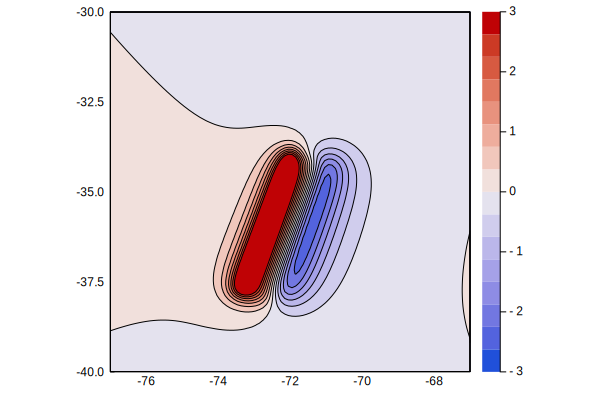

In [6]:
plt = plotsdtopo(dtopo; linetype=:contourf, color=:coolwarm, clims=(-3.0,3.0))

To save these figures, you can use `Plots.savefig()`.

In [7]:
using Plots
savefig(plt, "dtopo.svg")

### Sea surface elevation
Similarly, the spatial distribution of the sea surface height can be plotted with `VisClaw.plotsamr()`

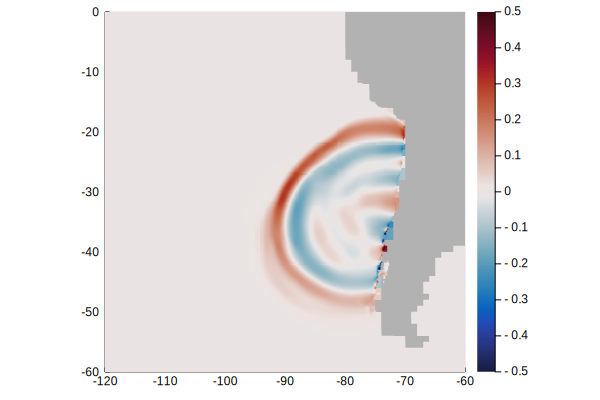

In [8]:
# plot
plts = plotsamr(amrall; c=:balance, clims=(-0.5,0.5))
plot(plts[6])

When you want to see the grid numbers in AMR, overwrite these plots with `VisClaw.gridnumber!()` 

┌ Info: Saved animation to 
│   fn = /home/miyashita/chile2010_eta.gif
└ @ Plots /home/miyashita/.julia/packages/Plots/O80o4/src/animation.jl:98


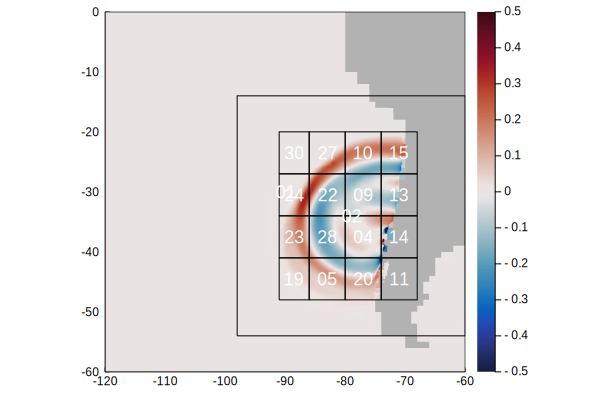

In [9]:
# overlay the grid numbers, and
plts = gridnumber!.(plts, amrall.amr; font=Plots.font(12, :white, :center))
plts = tilebound!.(plts, amrall.amr)

# make an animation
anim = Plots.Animation()
map(p->Plots.frame(anim, p), plts)
Plots.gif(anim, "~/chile2010_eta.gif"; fps=3)

# show
plot(plts[5])